# PAUL NOTE

1. Mostly from - https://www.kaggle.com/devishu14/beating-the-pneumonia-with-chest-x-ray-images

And some also from - https://www.kaggle.com/paramarthasengupta/pneumonia-diagnosis-eda-and-prediction

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import glob
import pandas as pd

2022-01-22 18:17:54.915814: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-22 18:17:54.915857: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
root_path = './input_datasets/Full_Dataset/'
# root_path = './input_datasets/smaller_dataset/'

train = get_training_data(root_path+'chest_xray/train')
test = get_training_data(root_path+'chest_xray/test')
val = get_training_data(root_path+'chest_xray/val')

<AxesSubplot:ylabel='count'>

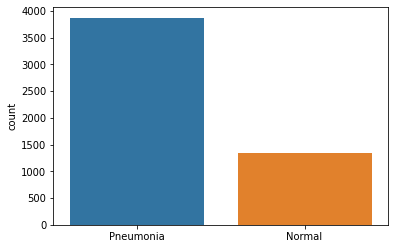

In [15]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.countplot(l) 

Text(0.5, 1.0, 'NORMAL')

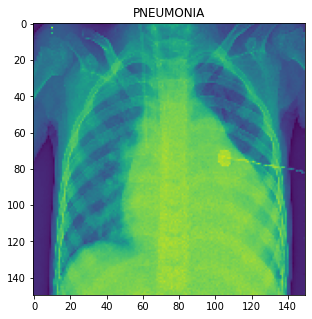

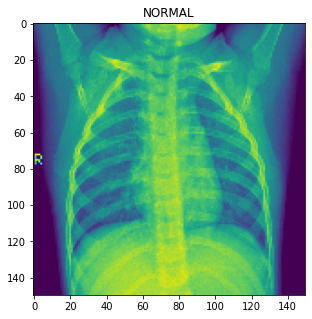

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='viridis')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='viridis')
plt.title(labels[train[-1][1]])

In [2]:
# root_path_2 = './input_datasets/smaller_dataset/chest_xray/'
root_path_2 = './input_datasets/Full_Dataset/chest_xray/'

train_path = os.path.join(root_path_2,"train")
test_path=os.path.join(root_path_2,"test")
val_path=os.path.join(root_path_2,"val")

pneumonia_train_images = glob.glob(train_path+"/PNEUMONIA/*.jpeg")
normal_train_images = glob.glob(train_path+"/NORMAL/*.jpeg")

pneumonia_val_images = glob.glob(val_path+"/PNEUMONIA/*.jpeg")
normal_val_images = glob.glob(val_path+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob(test_path+"/PNEUMONIA/*.jpeg")
normal_test_images = glob.glob(test_path+"/NORMAL/*.jpeg")

<AxesSubplot:title={'center':'Number of cases'}, xlabel='class', ylabel='count'>

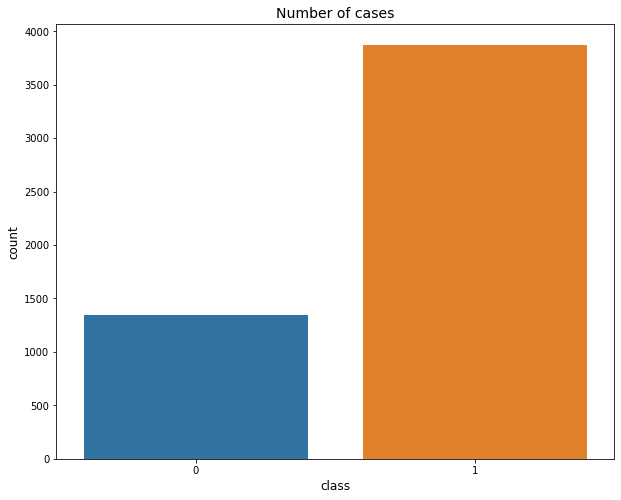

In [3]:
data = pd.DataFrame(np.concatenate([[0]*len(normal_train_images) , [1] *  len(pneumonia_train_images)]),columns=["class"])

plt.figure(figsize=(10,8))

plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.title('Number of cases', fontsize=14)
sns.countplot(data['class'],data=data)

# Basic X-Ray images

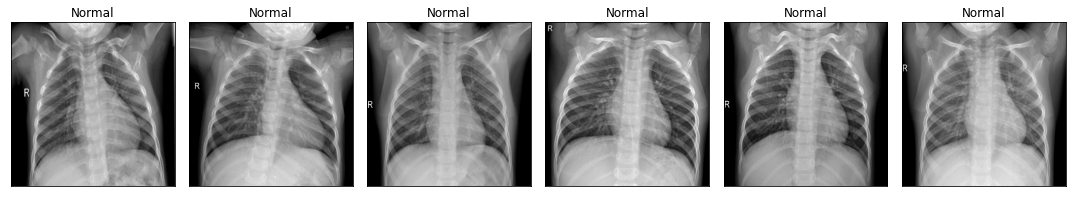

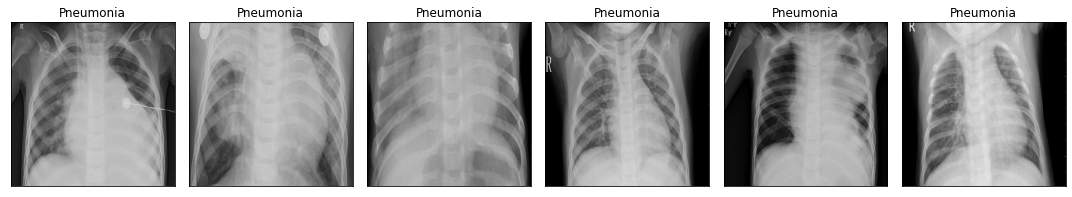

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Pneumonia")
fig.tight_layout()    
plt.show()

# Images with Canny Edges

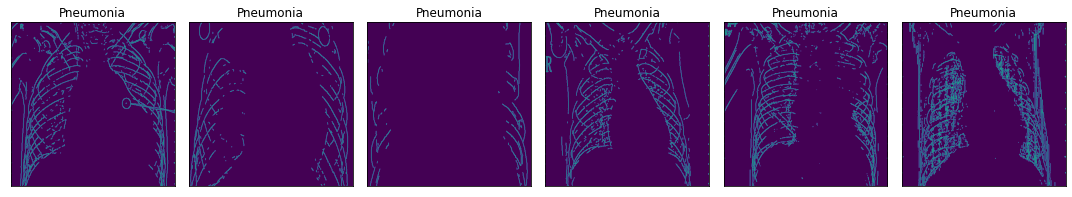

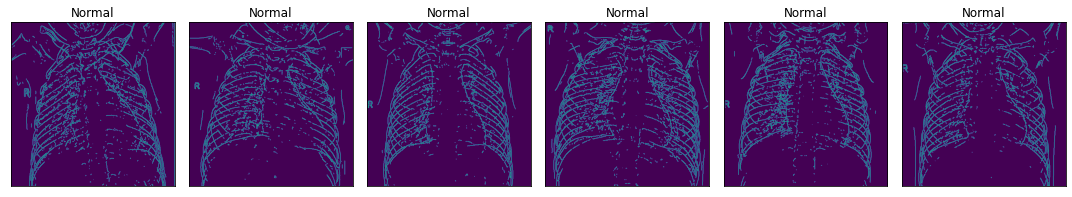

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()    
plt.show()

Ben Graham's Method

This method involves 2 steps:

- GrayScaling the images
- Applying Gaussian Blur

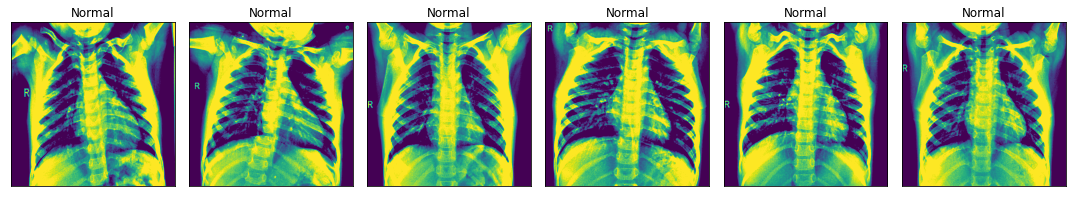

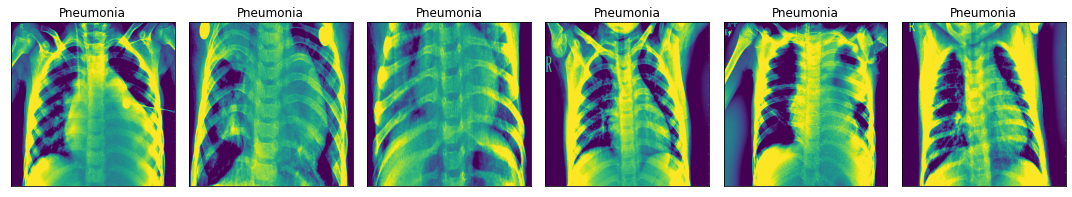

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    ax.imshow(img)
    ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

# Sobel Filter

The image is first read in as a grayscale image and converted to a matrix, then vertical and horizontal Sobel filters are applied to extract edges. Finally, we find the edge farthest from the center (approximated by the vertical center of the image) and crop vertically along this.

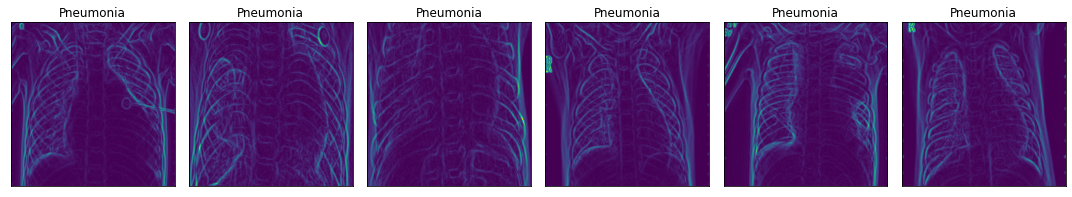

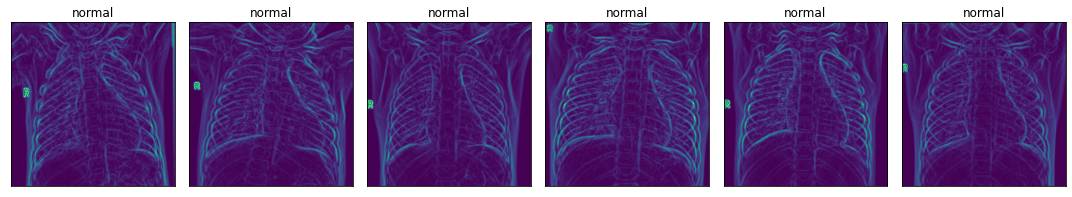

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (11, 11), 0)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    sobel_x = np.uint8(np.absolute(sobel_x))
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
    sobel_y = np.uint8(np.absolute(sobel_y))
    edged = cv2.bitwise_or(sobel_x, sobel_y)
    ax.imshow(edged)
    ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (11, 11), 0)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    sobel_x = np.uint8(np.absolute(sobel_x))
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
    sobel_y = np.uint8(np.absolute(sobel_y))
    edged = cv2.bitwise_or(sobel_x, sobel_y)
    ax.imshow(edged)
    ax.set_title("normal")
fig.tight_layout()
plt.show()

# Image Erosion


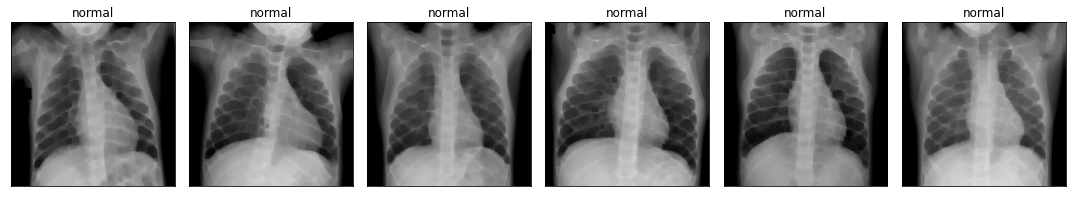

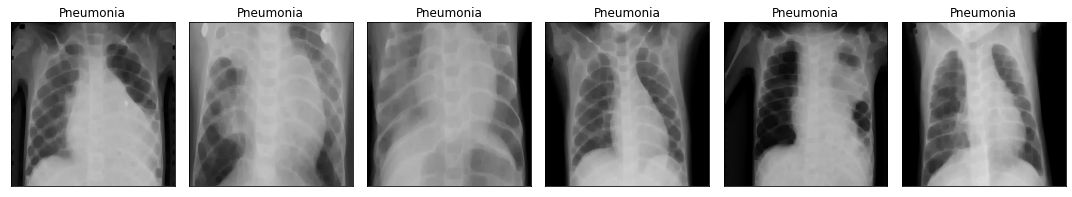

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=3)
    ax.imshow(img_erosion)
    ax.set_title("normal")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=3)
    ax.imshow(img_erosion)
    ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

# Image Dialation

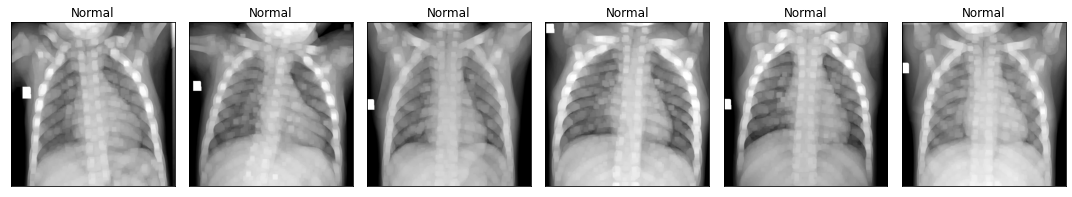

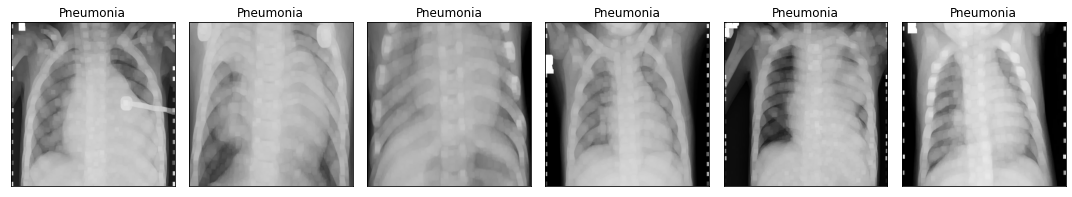

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.dilate(img, kernel, iterations=3)
    ax.imshow(img_erosion)
    ax.set_title("Normal")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.dilate(img, kernel, iterations=3)
    ax.imshow(img_erosion)
    ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

In [13]:
val_Pneumonia = len(os.listdir(val_path+'/PNEUMONIA'))
val_Normal =len(os.listdir(val_path+'/NORMAL'))
print(f'len(val_Normal) = {val_Normal},len(val_Pneumonia)={val_Pneumonia}')

len(val_Normal) = 8,len(val_Pneumonia)=8
